# K nearest neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x, y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h: X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1. Read the problem statement.

2. Get the dataset.

3. Explore the dataset.

4. Pre-processing of dataset.

5. Visualization

6. Transform the dataset for building machine learning model.

7. Split data into train, test set.

8. Build Model.

9. Apply the model.

10. Evaluate the model.

11. Finding Optimal K value

12. Repeat 7, 8, 9 steps.

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Download the dataset here:**
- https://www.kaggle.com/uciml/iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Load data

### Question 1

Import the data set and print 10 random rows from the data set

Hint: use **sample()** function to get random rows

### *I have added markdown cells below each code starting with "Tury: " to make it readable*

In [136]:
import pandas as pd
data = pd.read_csv("Iris.csv")

*Tury: Imported the dataset as "data" dataframe using pandas*

In [137]:
data.drop('Id',axis=1,inplace=True)

*Tury: Dropped Id column since it is not required for building the model*

In [138]:
data.sample(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
147,6.5,3.0,5.2,2.0,Iris-virginica
27,5.2,3.5,1.5,0.2,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
132,6.4,2.8,5.6,2.2,Iris-virginica
81,5.5,2.4,3.7,1.0,Iris-versicolor
77,6.7,3.0,5.0,1.7,Iris-versicolor
104,6.5,3.0,5.8,2.2,Iris-virginica
123,6.3,2.7,4.9,1.8,Iris-virginica
88,5.6,3.0,4.1,1.3,Iris-versicolor
83,6.0,2.7,5.1,1.6,Iris-versicolor


*Tury: Used sample function to display 10 random rows out of the dataset*

## Data Pre-processing

### Question 2 - Estimating missing values

Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median)

Calculate the number of missing values per column
- don't use loops

In [139]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

*Tury: Found missing values in each column by using isnull() function and used sum() function to find total number of missing values in each column.*

Fill missing values with median of that particular column

In [140]:
try:
    data.fillna(data.median(),inplace=True)
except:
    pass

*Tury: Though there are no missing values currently, above code will take care of any missing values in future data sets.*

### Question 3 - Dealing with categorical data

Change all the classes to numericals (0 to 2)

Hint: use **LabelEncoder()**

In [141]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])
data.sample(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
58,6.6,2.9,4.6,1.3,1
80,5.5,2.4,3.8,1.1,1
109,7.2,3.6,6.1,2.5,2


*Tury: Used LabelEncoder() to label classes into numerical values (Species column is now turned into values of 0,1,2).*

### Question 4

Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.

Hint: use **corr()**

In [142]:
data.corr()['Species']

SepalLengthCm    0.782561
SepalWidthCm    -0.419446
PetalLengthCm    0.949043
PetalWidthCm     0.956464
Species          1.000000
Name: Species, dtype: float64

*Tury: Used corr() function to find the correlation coeeficient for each column/variable with the target variable (Species here). No correlation coefficient lies between -0.1 and 0.1.*

### Question 5

Observe the independent variables variance and drop such variables having no variance or almost zero variance (variance < 0.1). They will be having almost no influence on the classification

Hint: use **var()**

In [143]:
try:
    data.drop(data[data.var().abs()]<0.1,axis=1,inplace=True)
except:
    pass

*Tury: Dropped the columns in dataframe where variance is less than 0.1. Added an exception handler since there are no such columns currently where var < 0.1.*

### Question 6

Plot the scatter matrix for all the variables.

Hint: use **pandas.plotting.scatter_matrix()**

you can also use pairplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1A012250>,
      dtype=object)

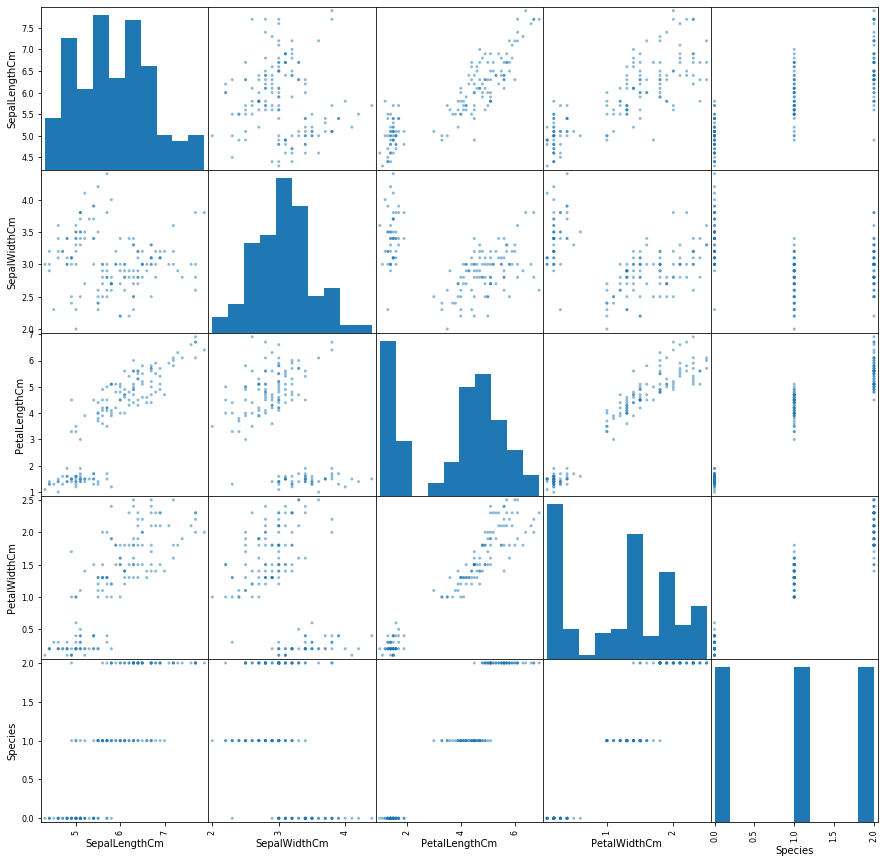

In [144]:
pd.plotting.scatter_matrix(data,figsize=(15,15))

*Tury: used scatter_matrix() function for the scatter plots for all variables.*

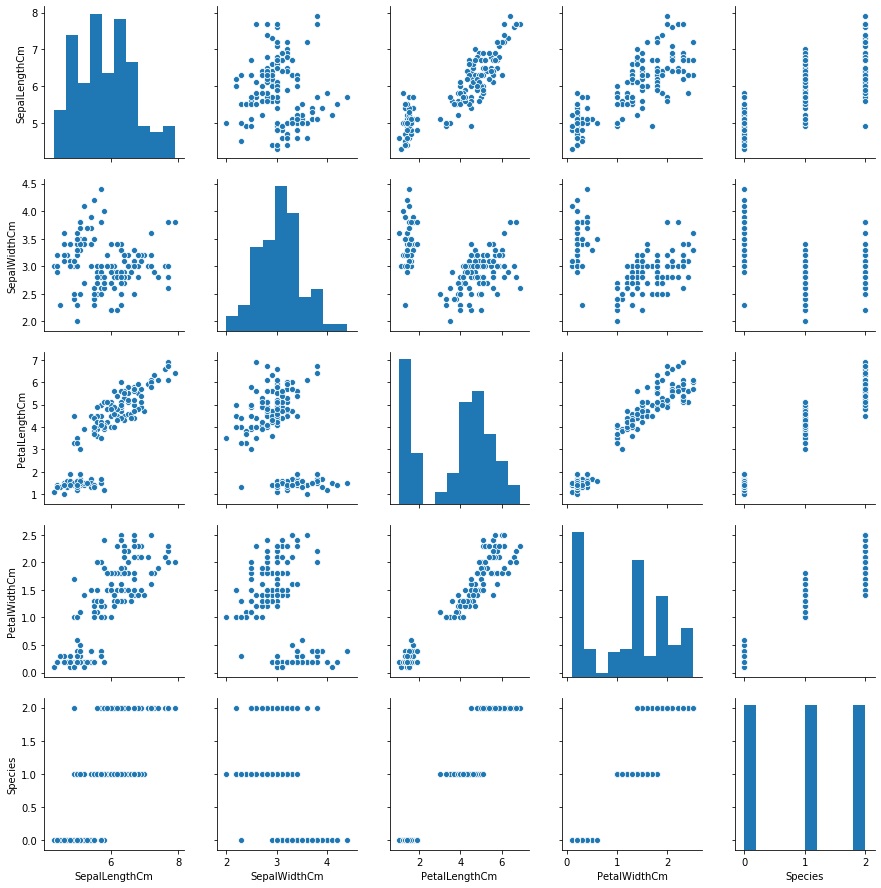

In [145]:
import seaborn as sns
sns.pairplot(data)

*Tury: alternate solution using Seaborn's pairplot() function. *

## Split the dataset into training and test sets


### Question 7

Split the dataset into training and test sets with 80-20 ratio

Hint: use **train_test_split()**

In [146]:
X = data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
Y = data['Species']

*Tury: identfied the x and y here - x being all the parameters and y being the target i.e. Species.
Accordingly, defined the x_train, x_test, y_train, y_test data sets from the original data in below code.*

In [147]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

*Tury: used train_test_split() function with test _size as 0.2 which means a 80%-20% split into training & test data.*

## Build Model

### Question 8

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [148]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
for i in (3,5,9):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_predicted = knn.predict(x_test)
    print("Training Accuracy Score of KNN model for k =",i,"is:",accuracy_score(knn.predict(x_train),y_train)*100,"%")
    print("Testing Accuracy Score of KNN model for k =",i,"is:",accuracy_score(y_predicted,y_test)*100,"%")

Training Accuracy Score of KNN model for k = 3 is: 96.66666666666667 %
Testing Accuracy Score of KNN model for k = 3 is: 96.66666666666667 %
Training Accuracy Score of KNN model for k = 5 is: 96.66666666666667 %
Testing Accuracy Score of KNN model for k = 5 is: 96.66666666666667 %
Training Accuracy Score of KNN model for k = 9 is: 96.66666666666667 %
Testing Accuracy Score of KNN model for k = 9 is: 100.0 %


*Tury: applied KNN model to the training data for k = 3, 5, and 9. Used accuracy_score() function to check the accuracy of the model on predicted value against test data.*

## Find optimal value of K

### Question 9 - Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

In [149]:
test_scores = []

In [150]:
train_scores = []

In [151]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
for n in range(1,20,2):
    knn1 = KNeighborsClassifier(n_neighbors=n)
    knn1.fit(x_train,y_train)
    train_scores.append(accuracy_score(knn1.predict(x_train),y_train))
    test_scores.append(accuracy_score(knn1.predict(x_test),y_test))

print("Training Accuracy Score of KNN model is:",train_scores)
print("Testing Accuracy Score of KNN model is:",test_scores)

Training Accuracy Score of KNN model is: [1.0, 0.9666666666666667, 0.9666666666666667, 0.975, 0.9666666666666667, 0.9666666666666667, 0.975, 0.975, 0.9666666666666667, 0.975]
Testing Accuracy Score of KNN model is: [0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


*Tury: applied KNN model to the training data for k = 1, 3, 5, ... 19. Used accuracy_score() function to check the accuracy of the model on predicted value against test data. test_scores and train_scores are arrays of the accuracy scores.*

## Plot accuracy

### Question 10

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

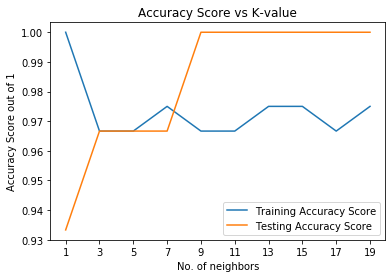

In [152]:
import matplotlib.pyplot as plt
plt.title("Accuracy Score vs K-value")
plt.plot(range(1,20,2),train_scores,label="Training Accuracy Score")
plt.plot(range(1,20,2),test_scores,label="Testing Accuracy Score")
plt.xticks(range(1,20,2))
plt.xlabel("No. of neighbors")
plt.ylabel("Accuracy Score out of 1")
plt.legend()
plt.show()

*Tury: Used pyplot from matplotlib to plot training/testing accuracy scores against k-values (number of neighbors).*

*Tury: From the plot, it is evident that accuracy is highest for k=5. Hence, __optimal value of k is 7__.*

# Breast cancer dataset

## Read data

### Question 1
Read the data given in bc2.csv file

In [97]:
import pandas as pd
data2 = pd.read_csv("bc2.csv",index_col=0)
data2.sample(3)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,,,,,,,,,,
1113061,5,1,1,1,2,1,3,1,1,2
1118039,5,3,4,1,8,10,4,9,1,4
1217952,4,1,1,1,2,1,2,1,1,2


*Tury: Imported the data set using read_csv() function and made Id column as index since it is not required for modelling.*

## Data preprocessing

### Question 2
Observe the no.of records in dataset and type of each column

In [98]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1000025 to 897471
Data columns (total 10 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(9), object(1)
memory usage: 57.3+ KB


*Tury: Used info() function to know about wach column data type and number of records together.*

### Question 3
Use summary statistics to check if missing values, outlier and encoding treament is necessary

Hint: use **describe()**

In [99]:
data2.describe()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


#### Check Missing Values

In [100]:
data2.isnull().sum()

ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

*Tury: Found missing values in each column by using isnull() function and used sum() function to find total number of missing values in each column.*

### Question 4
#### Check how many `?` are there in Bare Nuclei feature (they are also unknown or missing values). 

In [101]:
data2['Bare Nuclei'].value_counts()['?']

16

*Tury: Used value_counts() function to find number of records with value as "?" within Bare Nuclei column.*

#### Replace them with the 'top' value of the describe function of Bare Nuclei feature

Hint: give value of parameter include='all' in describe function

In [102]:
data2['Bare Nuclei'].describe(include='all')

count     699
unique     11
top         1
freq      402
Name: Bare Nuclei, dtype: object

In [103]:
data2['Bare Nuclei'].replace('?',1,inplace=True)

*Tury: Replaced all "?" values in Bare Nuclei column with the top value i.e. 1.*

### Question 5
#### Find the distribution of target variable (Class) 

In [104]:
data2['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

*Tury: Checked distribution of 'Class' column by value_counts() function.*

#### Plot the distribution of target variable using histogram

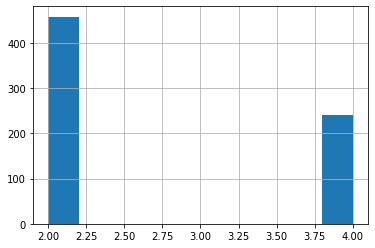

In [105]:
data2['Class'].hist()

*Tury: Used histogram to plot the distribution of values in 'Class' column.*

#### Convert the datatype of Bare Nuclei to `int`

In [106]:
data2['Bare Nuclei'] = data2['Bare Nuclei'].astype(dtype='int')

*Tury: Used astype() function to convert column into int data type.*

## Scatter plot

### Question 6
Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x16D22AD0>,
      dtype=object)

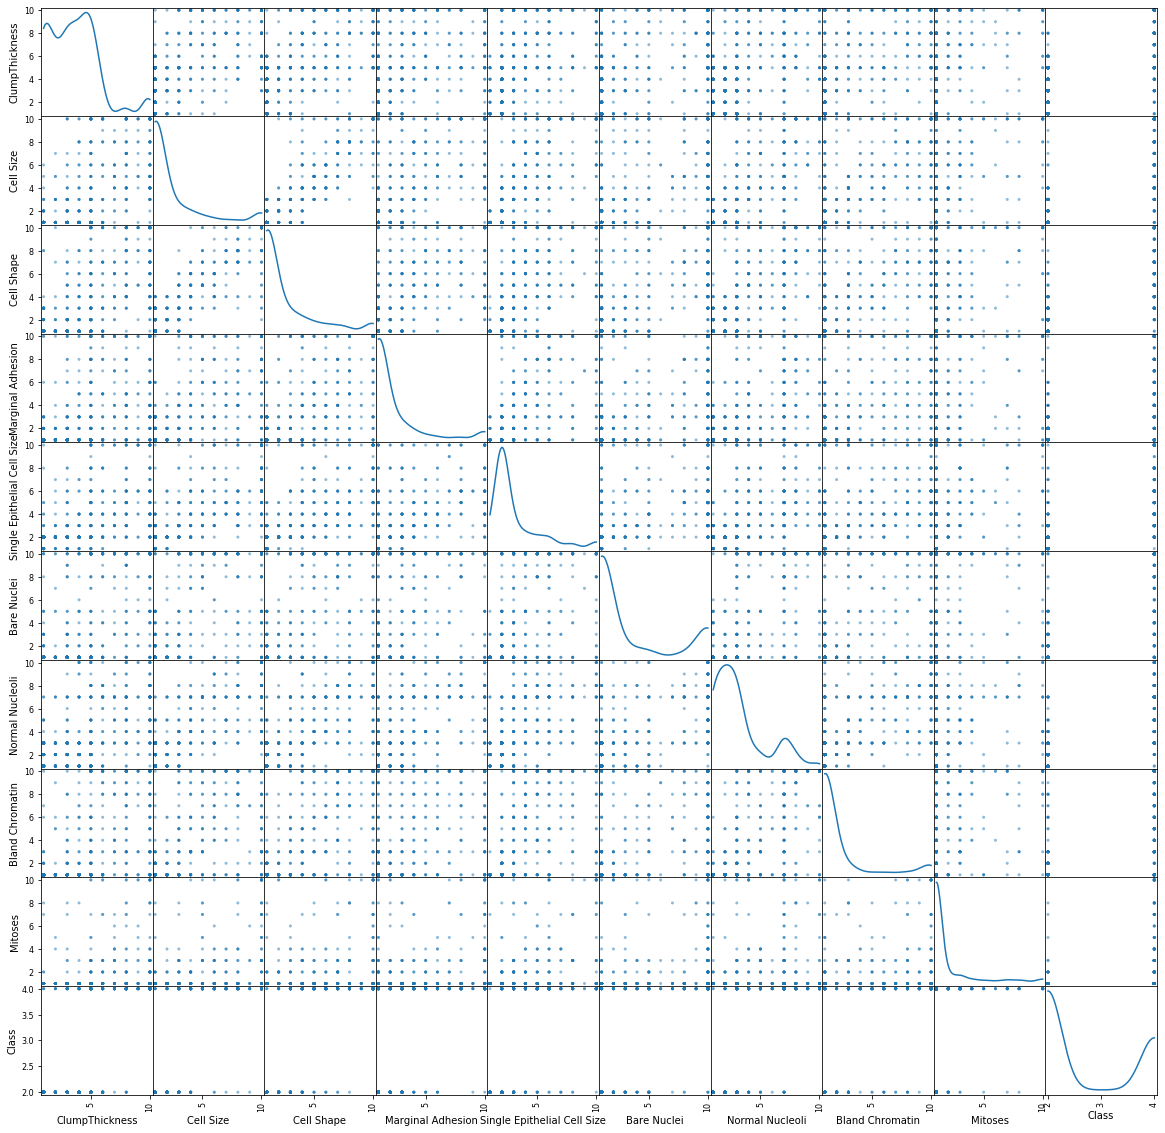

In [107]:
pd.plotting.scatter_matrix(data2,figsize=(20,20),diagonal='kde')

*Tury: Scatter Matrix was plotted using scatter_matrix() function.*

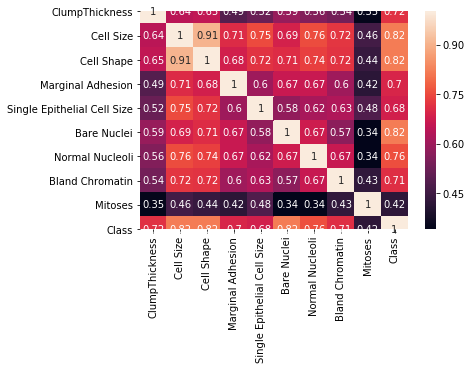

In [108]:
import seaborn as sns
sns.heatmap(data2.corr(),annot=True)

*Tury: Here we see that 'Cell Shape' and 'Cell Size' have a very high correlation coefficient of 0.91. Hence, we can drop either of the columns/variables.*

In [109]:
data2.drop('Cell Shape',axis=1,inplace=True)
data2.sample(3)

,ClumpThickness,Cell Size,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,,,,,,,,,
1201870,4,1,3,1,1,2,1,1,2
1181567,1,1,1,1,1,1,1,1,2
1276091,1,3,1,2,1,2,2,1,2


*Tury: Dropped 'Cell Shape' column beacuse of multicollinearity.*

## Train test split

### Question 7
#### Divide the dataset into feature set and target set

In [110]:
X2 = data2[['ClumpThickness','Cell Size','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Normal Nucleoli','Bland Chromatin','Mitoses']]

In [111]:
Y2 = data2['Class']

*Tury: All the parameters except 'Class' are identified as Feature Set and 'Class' column is identified as Target Set.*

#### Divide the Training and Test sets in 70:30 

In [112]:
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size = 0.3, random_state = 10)

## Scale the data

### Question 8
Standardize the data

Hint: use **StandardScaler()**

In [113]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x2_train)
scaledx2_train = sc.transform(x2_train)
scaledx2_test = sc.transform(x2_test)

*Tury: Used StandardScaler () function to scale training and testing data.*

## Build Model

### Question 9

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [114]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
for j in (3,5,9):
    knn2 = KNeighborsClassifier(n_neighbors=j)
    knn2.fit(x2_train,y2_train)
    y2_train_predicted = knn2.predict(x2_train)
    y2_predicted = knn2.predict(x2_test)
    print("Training Accuracy Score of KNN model for k =",j,"is:",accuracy_score(y2_train_predicted,y2_train)*100,"%")
    print("Testing Accuracy Score of KNN model for k =",j,"is:",accuracy_score(y2_predicted,y2_test)*100,"%")

Training Accuracy Score of KNN model for k = 3 is: 98.15950920245399 %
Testing Accuracy Score of KNN model for k = 3 is: 97.14285714285714 %
Training Accuracy Score of KNN model for k = 5 is: 97.75051124744377 %
Testing Accuracy Score of KNN model for k = 5 is: 96.66666666666667 %
Training Accuracy Score of KNN model for k = 9 is: 97.75051124744377 %
Testing Accuracy Score of KNN model for k = 9 is: 95.71428571428572 %


## Find optimal value of K

### Question 10
Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

In [115]:
train_scores_2 = []

In [116]:
test_scores_2 = []

In [117]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
for a in range(1,20,2):
    knn2 = KNeighborsClassifier(n_neighbors=a)
    knn2.fit(x2_train,y2_train)
    y2_predicted = knn2.predict(x2_test)
    train_scores_2.append(accuracy_score(knn2.predict(x2_train),y2_train))
    test_scores_2.append(accuracy_score(knn2.predict(x2_test),y2_test))

print("Training Accuracy Score of KNN model is:",train_scores_2)
print("Testing Accuracy Score of KNN model is:",test_scores_2)

Training Accuracy Score of KNN model is: [1.0, 0.9815950920245399, 0.9775051124744376, 0.9795501022494888, 0.9775051124744376, 0.9693251533742331, 0.9652351738241309, 0.9652351738241309, 0.9631901840490797, 0.9652351738241309]
Testing Accuracy Score of KNN model is: [0.9571428571428572, 0.9714285714285714, 0.9666666666666667, 0.9666666666666667, 0.9571428571428572, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9523809523809523, 0.9523809523809523]


*Tury: applied KNN model to the training data for k = 1, 3, 5, ... 19. Used accuracy_score() function to check the accuracy of the model on predicted value against test data. test_scores_2 and train_scores_2 are arrays of the accuracy scores.*

## Plot accuracy

### Question 11

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

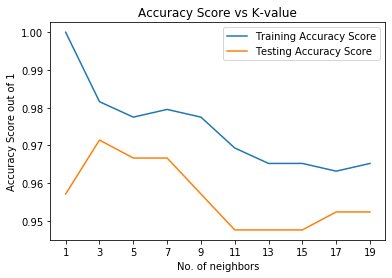

In [118]:
import matplotlib.pyplot as plt
plt.title("Accuracy Score vs K-value")
plt.plot(range(1,20,2),train_scores_2,label="Training Accuracy Score")
plt.plot(range(1,20,2),test_scores_2,label="Testing Accuracy Score")
plt.xticks(range(1,20,2))
plt.xlabel("No. of neighbors")
plt.ylabel("Accuracy Score out of 1")
plt.legend()
plt.show()

*Tury: Used pyplot from matplotlib to plot training/testing accuracy scores against k-values (number of neighbors).*

*Tury: From the plot, it is evident that accuracy is highest for k=3. Hence, __optimal value of k is 3__.*